## Data Leakage, L1(Lasso) and L2 (Ridge) regularization using Linear Regression

We will use cross validation, lasso and ridge regression in this lab.

Specifically speaking, <br>
Regularization basically adds the penalty as model complexity increases.<br>
Cross validation is used to evaluate how well our model can generalize on the dataset. <br>

We will be using r2 score in this lab. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model.


In this task, we will explore the following things on linear regression model:
- Cross Validation
- L1 regularization (Lasso regression)
- L2 regularization (Ridge regression)


#### Dataset
The dataset is available at "data/bike.csv" in the respective challenge's repo.<br>

The dataset is __modified version__ of the dataset 'bike.csv' provided by UCI Machine Learning repository.

Original dataset: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

#### Objective
To learn about how cross validation, L1 regularization and L2 regularization work.

#### Tasks
- load the dataset.
- perform pre-processing on the data.
- remove registered feature and keep the casual feature to understand data leakage.
- construct train and test dataset.
- create a linear regression model.
- check the r2 score of the initial linear regression model on train and test dataset
- observe distribution of weights in the initial linear regression model. 
- split the dataset into k consecutive folds.
- calculate cross validation score for the k fold and check how well our model can generalize on the training dataset.
- checking the variance threshold of dataset and remove features with low variance.
- apply L1 regularization on the dataset and check the r2_score.
- visualize the distribution of weights on the lasso regression model.
- apply L2 regularization on the dataset and check the r2_score.
- visualize the distribution of weights on the ridge regression model. 

#### Further fun
- apply RFE on the dataset to automatically remove uneccessary features which would prevent overfitting.
- don't remove casual and registered features and check the effect of data leakage on the model
- implement lasso and ridge regression without using inbuilt librarires.
- apply elastic net to visualize the effect of both ridge and lasso regression.


#### Helpful links
- Cross validation : https://machinelearningmastery.com/k-fold-cross-validation/#:~:text=Cross%2Dvalidation%20is%20a%20resampling,k%2Dfold%20cross%2Dvalidation.
- Cross validation: https://scikit-learn.org/stable/modules/cross_validation.html
- L1 and L2 regularization : https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
- L1 and L2 regularization : https://www.youtube.com/watch?v=9lRv01HDU0s&list=PLZoTAELRMXVPBTrWtJkn3wWQxZkmTXGwe&index=30&t=904s
- r2_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
- pd.get_dummies() and One Hot Encoding: https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example
- Data Leakage : "https://machinelearningmastery.com/data-leakage-machine-learning/
- sklearn k-fold : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- sklearn cross_val_score : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score
- sklearn lasso regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html?highlight=lasso#sklearn.linear_model.Lasso
- sklearn ridge regression : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html?highlight=ridge#sklearn.linear_model.Ridge
- RFE : https://machinelearningmastery.com/rfe-feature-selection-in-python/
- RFE sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
- Use slack for doubts: 

In [112]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Sklearn linear regression model
from sklearn.linear_model import LinearRegression

# Sklearn regression model evaluation functions
from sklearn.metrics import r2_score

# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

# Feature selection using Recursive Feature Elimimation
from sklearn.feature_selection import RFE

In [113]:
#load the data and inspect the first 5 rows
data = pd.read_csv("data/bike.csv",delimiter=",")

In [114]:
# print the data types of each feature name
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 18 columns):
id                          365 non-null int64
season                      365 non-null object
year                        365 non-null int64
holiday                     365 non-null int64
weekday                     365 non-null int64
workingday                  365 non-null int64
weather                     365 non-null object
temp                        365 non-null float64
feel_temp                   365 non-null float64
hum                         365 non-null float64
windspeed                   365 non-null float64
promotion_level             365 non-null int64
promotion_type              365 non-null int64
promotion_level_external    365 non-null int64
promotion_type_external     365 non-null int64
casual                      365 non-null int64
registered                  365 non-null int64
cnt                         365 non-null int64
dtypes: float64(4), int64(12), object(2

In [115]:
# check for null values in each column
data.isna().sum()

id                          0
season                      0
year                        0
holiday                     0
weekday                     0
workingday                  0
weather                     0
temp                        0
feel_temp                   0
hum                         0
windspeed                   0
promotion_level             0
promotion_type              0
promotion_level_external    0
promotion_type_external     0
casual                      0
registered                  0
cnt                         0
dtype: int64

In [116]:
# print out the unique values of the features ['season', 'year', 'weather', 'promotion_type']
print(data["season"].unique())
print(data["year"].unique())
print(data["weather"].unique())

['winter' 'spring' 'summer' 'autumn']
[2016]
['cloud' 'fair' 'rain']


In [117]:
# print out the value counts (frequency of occurence) of the unique values in these features ['season', 'year', 'weather', 'promotion_type']
print(data["season"].value_counts())
print(data["year"].value_counts())
print(data["weather"].value_counts())

summer    92
spring    92
autumn    91
winter    90
Name: season, dtype: int64
2016    365
Name: year, dtype: int64
fair     226
cloud    124
rain      15
Name: weather, dtype: int64


In [118]:
# print the shape of data
data.shape

(365, 18)

In [119]:
# drop the feature 'id' as it has no information to deliver.

data = data.drop('id', axis = 1)

In [120]:
# print the shape of data
data.shape

(365, 17)

In [121]:
# one hot encode the categorical columns.
cat_cols = ["season","weather"]
data = pd.get_dummies(data,columns = cat_cols, prefix = cat_cols )
data.head()

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,...,casual,registered,cnt,season_autumn,season_spring,season_summer,season_winter,weather_cloud,weather_fair,weather_rain
0,2016,0,6,0,0.344167,0.363625,0.805833,0.160446,7,1,...,226,654,880,0,0,0,1,1,0,0
1,2016,0,0,0,0.363478,0.353739,0.696087,0.248539,8,1,...,125,670,795,0,0,0,1,1,0,0
2,2016,0,1,1,0.196364,0.189405,0.437273,0.248309,3,1,...,75,1229,1304,0,0,0,1,0,1,0
3,2016,0,2,1,0.200000,0.212122,0.590435,0.160296,0,1,...,67,1454,1521,0,0,0,1,0,1,0
4,2016,0,3,1,0.226957,0.229270,0.436957,0.186900,2,0,...,58,1518,1576,0,0,0,1,0,1,0


In [122]:
# print the shape of data 
# notice the increase in the no. of features
data.shape

(365, 22)

Notice that our target feature "cnt" is the sum of the features "registered" + "casual"<br>

To avoid data leakage remove the feature "casual" for the training purpose. <br>

To understand more about data leakage refer the article mentioned in the uselful links.

In [123]:
data = data.drop(['casual'],axis=1)
data.head(10)

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,...,promotion_type_external,registered,cnt,season_autumn,season_spring,season_summer,season_winter,weather_cloud,weather_fair,weather_rain
0,2016,0,6,0,0.344167,0.363625,0.805833,0.160446,7,1,...,2,654,880,0,0,0,1,1,0,0
1,2016,0,0,0,0.363478,0.353739,0.696087,0.248539,8,1,...,1,670,795,0,0,0,1,1,0,0
2,2016,0,1,1,0.196364,0.189405,0.437273,0.248309,3,1,...,2,1229,1304,0,0,0,1,0,1,0
3,2016,0,2,1,0.200000,0.212122,0.590435,0.160296,0,1,...,3,1454,1521,0,0,0,1,0,1,0
4,2016,0,3,1,0.226957,0.229270,0.436957,0.186900,2,0,...,1,1518,1576,0,0,0,1,0,1,0
5,2016,0,4,1,0.204348,0.233209,0.518261,0.089565,0,0,...,3,1518,1581,0,0,0,1,0,1,0
6,2016,0,5,1,0.196522,0.208839,0.498696,0.168726,4,1,...,3,1362,1450,0,0,0,1,1,0,0
7,2016,0,6,0,0.165000,0.162254,0.535833,0.266804,6,1,...,1,891,969,0,0,0,1,1,0,0
8,2016,0,0,0,0.138333,0.116175,0.434167,0.361950,5,1,...,0,768,838,0,0,0,1,0,1,0
9,2016,0,1,1,0.150833,0.150888,0.482917,0.223267,4,0,...,2,1280,1310,0,0,0,1,0,1,0


In [124]:
# Split the dataset into X and y
# While loading data into X drop the columns "cnt" and "casual". 
X = data.drop(['cnt'],axis = 1)
y = data.cnt

In [125]:
# store the names of the training features / name of the columns used for training. [Very important step for visualization later.]

train_columns = list(X.columns)
print(train_columns)

['year', 'holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_type', 'promotion_level_external', 'promotion_type_external', 'registered', 'season_autumn', 'season_spring', 'season_summer', 'season_winter', 'weather_cloud', 'weather_fair', 'weather_rain']


In [126]:
# Apply scaling if our data is spread across wide differences of range values.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X[:] = sc.fit_transform(pd.DataFrame(X[:]))
X.head()

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,registered,season_autumn,season_spring,season_summer,season_winter,weather_cloud,weather_fair,weather_rain
0,0.0,0.0,1.000000,0.0,0.360789,0.373517,0.828620,0.284606,0.777778,1.0,0.111111,0.666667,0.056694,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.385232,0.360541,0.715771,0.466215,0.888889,1.0,0.777778,0.333333,0.060505,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.166667,1.0,0.173705,0.144830,0.449638,0.465740,0.333333,1.0,1.000000,0.666667,0.193664,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.333333,1.0,0.178308,0.174649,0.607131,0.284297,0.000000,1.0,0.777778,1.000000,0.247261,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.500000,1.0,0.212429,0.197158,0.449313,0.339143,0.222222,0.0,0.444444,0.333333,0.262506,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [127]:
# print the type of X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 20 columns):
year                        365 non-null float64
holiday                     365 non-null float64
weekday                     365 non-null float64
workingday                  365 non-null float64
temp                        365 non-null float64
feel_temp                   365 non-null float64
hum                         365 non-null float64
windspeed                   365 non-null float64
promotion_level             365 non-null float64
promotion_type              365 non-null float64
promotion_level_external    365 non-null float64
promotion_type_external     365 non-null float64
registered                  365 non-null float64
season_autumn               365 non-null float64
season_spring               365 non-null float64
season_summer               365 non-null float64
season_winter               365 non-null float64
weather_cloud               365 non-null float64
weather_fair 

Note : <br>
Type of X should be pandas dataframe.
If not then convert X into pandas DataFrame object before proceeding further.


In [128]:
# convert X into pandas Dataframe
# in the parameters specify columns = train_columns.

X = pd.DataFrame(X, columns = train_columns)
X.head()

,year,holiday,weekday,workingday,temp,feel_temp,hum,windspeed,promotion_level,promotion_type,promotion_level_external,promotion_type_external,registered,season_autumn,season_spring,season_summer,season_winter,weather_cloud,weather_fair,weather_rain
0,0.0,0.0,1.000000,0.0,0.360789,0.373517,0.828620,0.284606,0.777778,1.0,0.111111,0.666667,0.056694,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.385232,0.360541,0.715771,0.466215,0.888889,1.0,0.777778,0.333333,0.060505,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.166667,1.0,0.173705,0.144830,0.449638,0.465740,0.333333,1.0,1.000000,0.666667,0.193664,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.333333,1.0,0.178308,0.174649,0.607131,0.284297,0.000000,1.0,0.777778,1.000000,0.247261,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.500000,1.0,0.212429,0.197158,0.449313,0.339143,0.222222,0.0,0.444444,0.333333,0.262506,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [129]:
# split the dataset into X_train, X_test, y_train, y_test
# play around with test sizes.

test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)

In [130]:
# print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(255, 20)
(110, 20)
(255,)
(110,)


In [131]:
# build the Linear Regression model.

model = LinearRegression()

# fit the model on the training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
# print the score on training set
y_pred_train = model.predict(X_train)
print("On Training set : ", r2_score(y_train, y_pred_train))

On Training set :  0.9885517470117793


In [133]:
# print the score on the test set
y_pred_test = model.predict(X_test)
print("On testing set : ", r2_score(y_test,y_pred_test))

On testing set :  0.980711310640753


Do not edit the code given below. Observe the distribution of weights. 
Which feature has the maximum coefficient ? <br>
Keep this figure as a base reference for visualizing the effects of l1-norm and l2-norm later in this notebook.

In [134]:
# custom summary function to plot the coefficients / weightage of the features.
def custom_summary(model, column_names, title):
    '''Show a summary of the trained linear regression model'''

    # Plot the coeffients as bars
    fig = plt.figure(figsize=(8,len(column_names)/3))
    fig.suptitle(title, fontsize=16)
    rects = plt.barh(column_names, model.coef_,color="lightblue")

    # Annotate the bars with the coefficient values
    for rect in rects:
        width = round(rect.get_width(),4)
        plt.gca().annotate('  {}  '.format(width),
                    xy=(0, rect.get_y()),
                    xytext=(0,2),  
                    textcoords="offset points",  
                    ha='left' if width<0 else 'right', va='bottom')        
    plt.show()

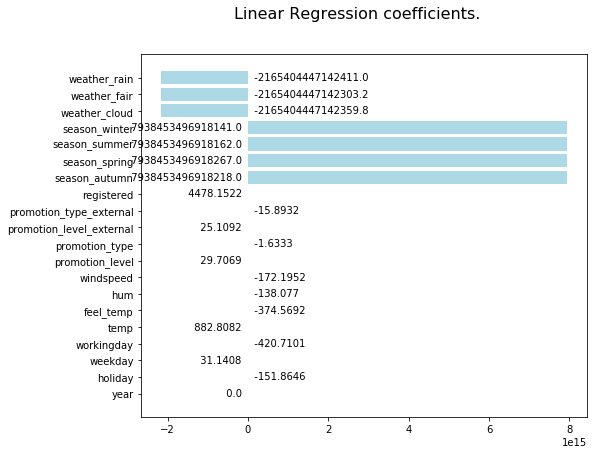

In [135]:
# coefficients plot
# let's call the above custom function.

custom_summary(model, train_columns, "Linear Regression coefficients.")

In [136]:
# evaluate the model with k = 10 Fold Cross validation

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
results = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = folds)

print(type(model).__name__)
print("kFoldCV:")
print("Fold R2 scores:", results)
print("Mean R2 score:", results.mean())
print("Std R2 score:", results.std())
print("Generalizability on training set : ", results.mean(), " +/- ", results.std())

LinearRegression
kFoldCV:
Fold R2 scores: [0.98815261 0.98209301 0.98042212 0.98215298 0.99207249 0.99181166
 0.97397676 0.9808742  0.99344011 0.98878237]
Mean R2 score: 0.9853778310800688
Std R2 score: 0.006054082431940396
Generalizability on training set :  0.9853778310800688  +/-  0.006054082431940396


Feature Selection using Variance Thresholding

In [137]:
print("Original shape of X_train : ", X_train.shape)

Original shape of X_train :  (255, 20)


In [138]:
# check the variance of X.
# Note the type(X) should be a pandas DataFrame as stated earlier.

X.var()

year                        0.000000
holiday                     0.026720
weekday                     0.111796
workingday                  0.216393
temp                        0.057592
feel_temp                   0.049115
hum                         0.023394
windspeed                   0.025126
promotion_level             0.044400
promotion_type              0.250685
promotion_level_external    0.104256
promotion_type_external     0.134599
registered                  0.063770
season_autumn               0.187671
season_spring               0.189041
season_summer               0.189041
season_winter               0.186286
weather_cloud               0.224928
weather_fair                0.236444
weather_rain                0.039515
dtype: float64

Remove low variance features using Variance Threshold. 

Note : If the variance is less, it implies the values of that particular feature spans limited range of values.

In [139]:
# play around with the threshold values

sel = VarianceThreshold(threshold = (0.01))
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [140]:
# do not edit.

selected_features = list(X_train.columns[sel.get_support()])
print("Selected features : ", selected_features)
print("Removed features : ", list(X_train.columns[~sel.get_support()]))

Selected features :  ['holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_type', 'promotion_level_external', 'promotion_type_external', 'registered', 'season_autumn', 'season_spring', 'season_summer', 'season_winter', 'weather_cloud', 'weather_fair', 'weather_rain']
Removed features :  ['year']


In [141]:
# Delete the removed features from the train_columns list.

removed_features = list(X_train.columns[~sel.get_support()])
for i in removed_features:
      train_columns.remove(i)

In [142]:
print(train_columns)

['holiday', 'weekday', 'workingday', 'temp', 'feel_temp', 'hum', 'windspeed', 'promotion_level', 'promotion_type', 'promotion_level_external', 'promotion_type_external', 'registered', 'season_autumn', 'season_spring', 'season_summer', 'season_winter', 'weather_cloud', 'weather_fair', 'weather_rain']


In [143]:
#transform / remove the low variance features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [153]:
X = sel.transform(X)

array([[0.        , 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.66666667, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.83333333, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

numpy.ndarray

## Lasso Regression : L1 - norm

In [155]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# hyperparamater alpha : controls the degree of penaliation.
# play around with alpha values.
alpha = 1.0

#create the model
model_lasso = Lasso(alpha = alpha)

#fit the model on training data
model_lasso.fit(X_train, y_train)

#calculate the score on training data
y_pred_train = model_lasso.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))

On train set :  0.9860147712084001


In [156]:
#evaluate the model on testing data
y_pred_test = model_lasso.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9882337741246177


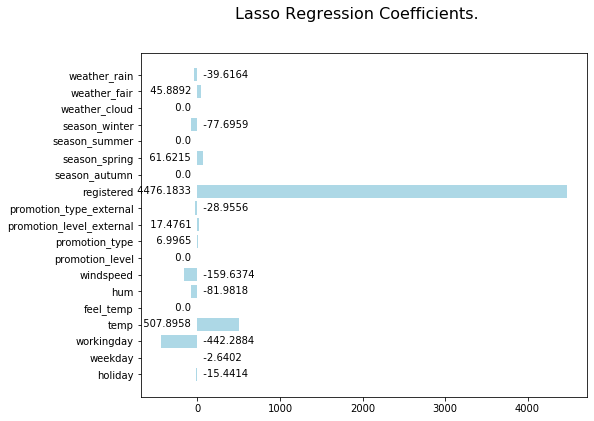

In [157]:
# visualize the coefficients.
# compare the results with the plot obtained earlier.

custom_summary(model_lasso, train_columns, "Lasso Regression Coefficients.")

We can see that Lasso regression has automatically done a lot of feature selection. Some columns might have zero coefficients. It has been effectively removed. <br> 
The model is much more interpretable than the baseline linear regression model.
<br>
Hence, Lasso regression has embedded Feature Selection.

# Ridge Regression : L2 - norm

In [158]:
from sklearn.linear_model import Ridge

# hyperparamater alpha : controls the degree of penaliation.
# play around with alpha values.
alpha = 1.0

#create the model
model_ridge = Ridge(alpha = alpha)

#fit the model on training data
model_ridge.fit(X_train, y_train)

#calculate the score on training data
y_pred_train = model_ridge.predict(X_train)
print("On train set : ", r2_score(y_train, y_pred_train))


On train set :  0.9793447411286846


In [159]:
#evaluate the model on testing data
y_pred_test = model_ridge.predict(X_test)
print("On test set : ", r2_score(y_test, y_pred_test))

On test set :  0.9794307362663421


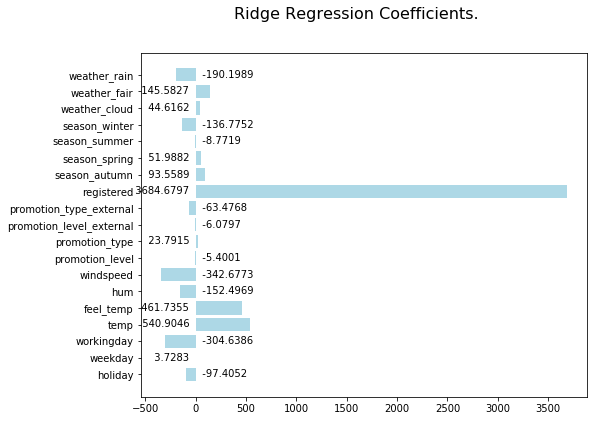

In [160]:
# visualize the coefficients.
# compare the results with the plot obtained earlier.

custom_summary(model_ridge, train_columns, "Ridge Regression Coefficients.")

Ridge regression doesn't drive smaller coefficients to 0 hence it doesn't possess internal feature selection.

Points to Ponder ! [Optional]

Did you notice the highest dependency on the feature "registered" if you haven't removed it till now ?

Since our target is "cnt" which is the simple combination of "registered" and "casual".

we have removed "casual", but the model was smart enough to predict the target "cnt" simply from one feature "registered" itself. 

This is the classic example of Data Leakage. So the aim here is not to make 99 percent accurate predictions, the aim is to take into account the factors for making predictions.

So, to get a detailed report, we should avoid data leakage thereby removing both the features "registered" and "casual".